In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
pd.set_option('display.max_columns', 50)

def clear_cols(s):
    return s.strip().replace(" ","_")

In [4]:
inpatient_path   = '../Healthcare Provider Fraud Detection Analysis/Train_Inpatientdata-1542865627584.csv'
outpatient_path  = '../Healthcare Provider Fraud Detection Analysis/Train_Outpatientdata-1542865627584.csv'
train_path       = '../Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'
beneficiary_path = '../Healthcare Provider Fraud Detection Analysis/Train_Beneficiarydata-1542865627584.csv'

# read inpatient outpatient and train files data
inpatient  = pd.read_csv(inpatient_path).rename(columns=clear_cols)
outpatient = pd.read_csv(outpatient_path).rename(columns=clear_cols)
train       = pd.read_csv(train_path).rename(columns=clear_cols)
bene       = pd.read_csv(beneficiary_path).rename(columns=clear_cols)

In [5]:
most_and_least = inpatient.groupby('Provider')[['BeneID']].count().reset_index().rename(columns={'BeneID': 'count_bene'})

In [6]:
df = most_and_least.merge(train, on='Provider', how='left')
df

,Provider,count_bene,PotentialFraud
0,PRV51001,5,No
1,PRV51003,62,Yes
2,PRV51007,3,No
3,PRV51008,2,No
4,PRV51011,1,No
...,...,...,...
2087,PRV57719,4,No
2088,PRV57728,1,No
2089,PRV57729,11,No
2090,PRV57732,11,No


In [7]:
# ml_env environment
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [8]:
X = df[['count_bene']]
X

,count_bene
0,5
1,62
2,3
3,2
4,1
...,...
2087,4
2088,1
2089,11
2090,11


In [9]:
y = (df.PotentialFraud == 'Yes').astype(int)
y

0       0
1       1
2       0
3       0
4       0
       ..
2087    0
2088    0
2089    0
2090    0
2091    0
Name: PotentialFraud, Length: 2092, dtype: int64

In [10]:
y.value_counts()  # 1 == YES (Fraud)

PotentialFraud
0    1652
1     440
Name: count, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)
# y_pred

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy fraud based on number of bene/ inpatient: {accuracy:.2f}")

Accuracy fraud based on number of bene/ inpatient: 0.83


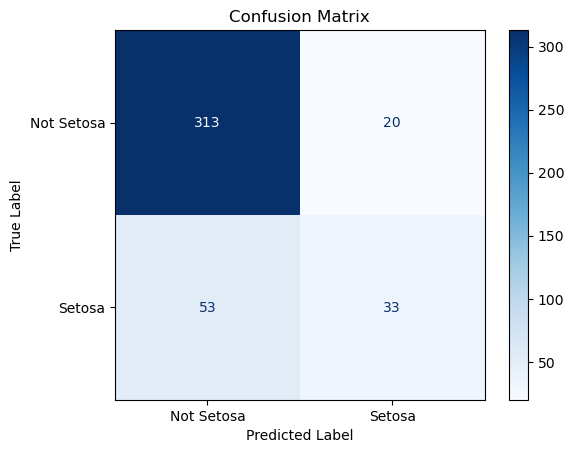

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Setosa', 'Setosa'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
TN, FP, FN, TP = cm.ravel()

In [18]:
# Calculating metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Accuracy: {accuracy:.2f}')
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f'Precision: {precision:.2f}')
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f'Recall: {recall:.2f}')
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f'F1 Score: {f1_score:.2f}')

Accuracy: 0.83
Precision: 0.62
Recall: 0.38
F1 Score: 0.47


#### I'll try to get better results here:

In [20]:
y_proba = model.predict_proba(X_test)[:, 1]

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

f1_scores = 2* (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[f1_scores.argmax()]

In [22]:
best_threshold

np.float64(0.204261281562125)

In [23]:
y_pred_custom = (y_proba >= best_threshold).astype(int)
cm1 = confusion_matrix(y_test, y_pred_custom)
print(f'Confusion Matrix with best threshold:\n{cm1}')

Confusion Matrix with best threshold:
[[289  44]
 [ 31  55]]


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f'Accuracy score: {accuracy_score(y_test, y_pred_custom)}')
print(f'Precision score: {precision_score(y_test, y_pred_custom)}')
print(f'Recall score: {recall_score(y_test, y_pred_custom)}')
print(f'F1 score: {f1_score(y_test, y_pred_custom)}')


Accuracy score: 0.8210023866348448
Precision score: 0.5555555555555556
Recall score: 0.6395348837209303
F1 score: 0.5945945945945946


In [ ]:
precision_score(y)